# Data preprocessing

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc



df = pd.read_csv('/content/diabetes1.csv')

df.isnull().sum()



,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [23]:

df.drop_duplicates(inplace=True)



print(df.head())
print(df.tail())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

In [24]:

print("--- Data Report Card (Descriptive Statistics) ---")

report_card = df.describe()

print(report_card)

--- Data Report Card (Descriptive Statistics) ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232

--- Looking for Outliers with Box Plots ---


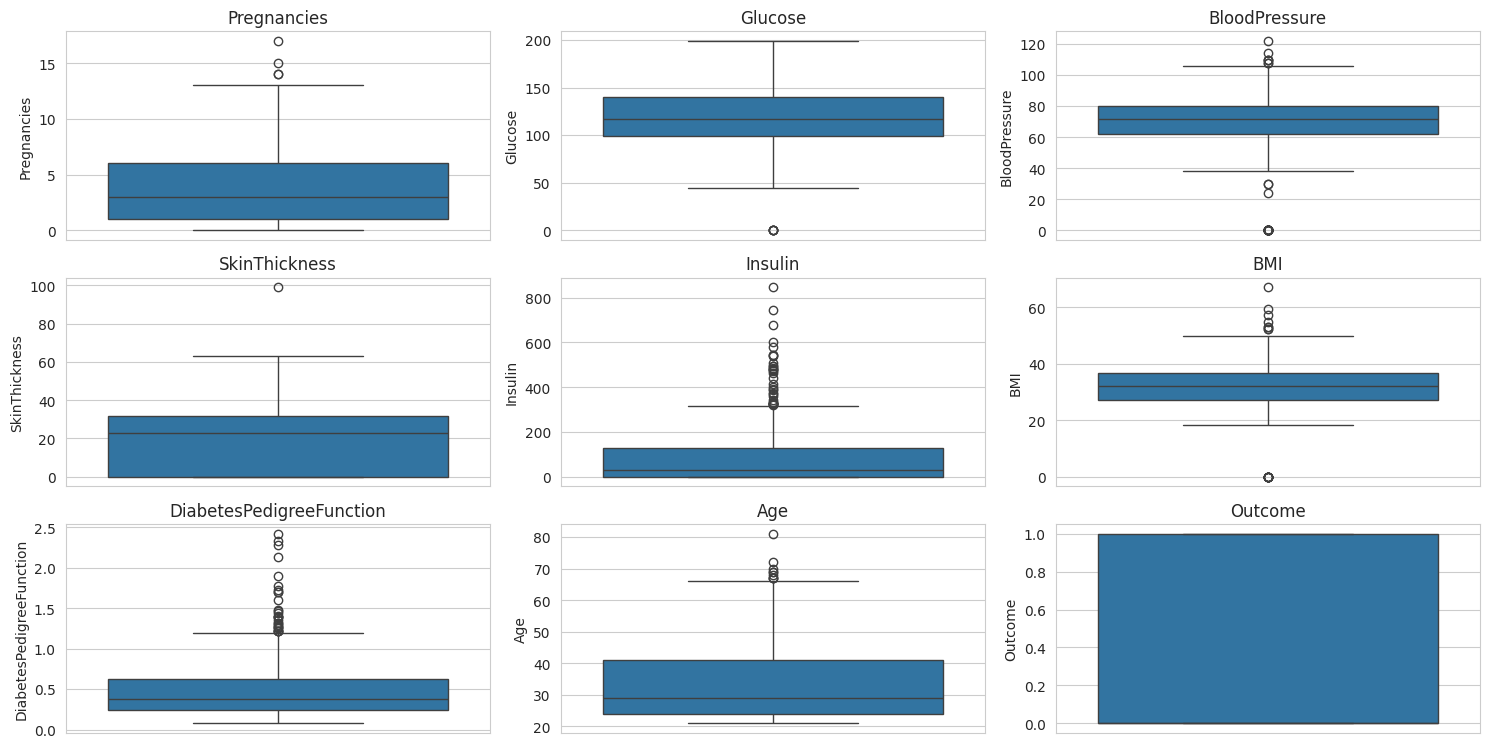

In [25]:
print("--- Looking for Outliers with Box Plots ---")

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.savefig('outlier_boxplots.png')

plt.show()

The graphs reveal that patients with liver disease have significantly higher levels of bilirubin and specific liver enzymes, while their protein levels are often lower. These particular tests are strong clues for identifying the illness. The data also shows that while most patients have normal test results, a few have extremely high values, and the dataset includes more men than women

# EDA

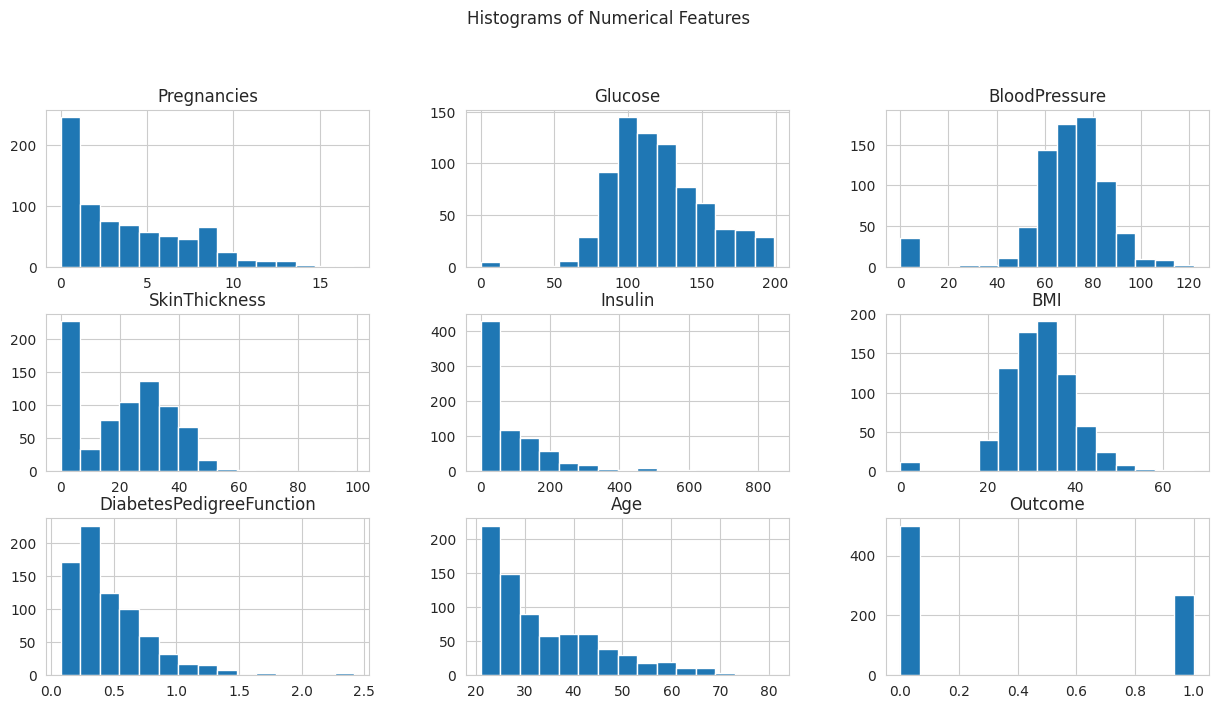

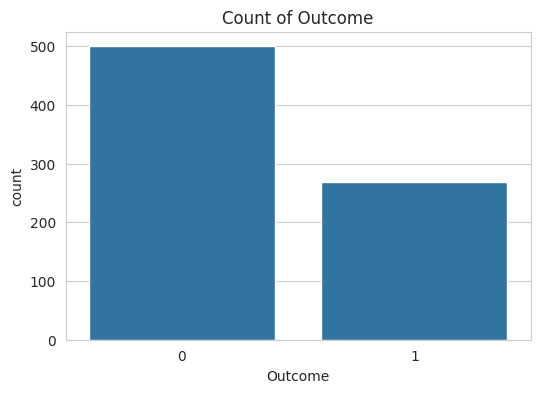

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")


numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of Numerical Features')
plt.savefig('numerical_histograms.png')



plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Count of Outcome')
plt.savefig('Outcome_countplot.png')


plt.show()

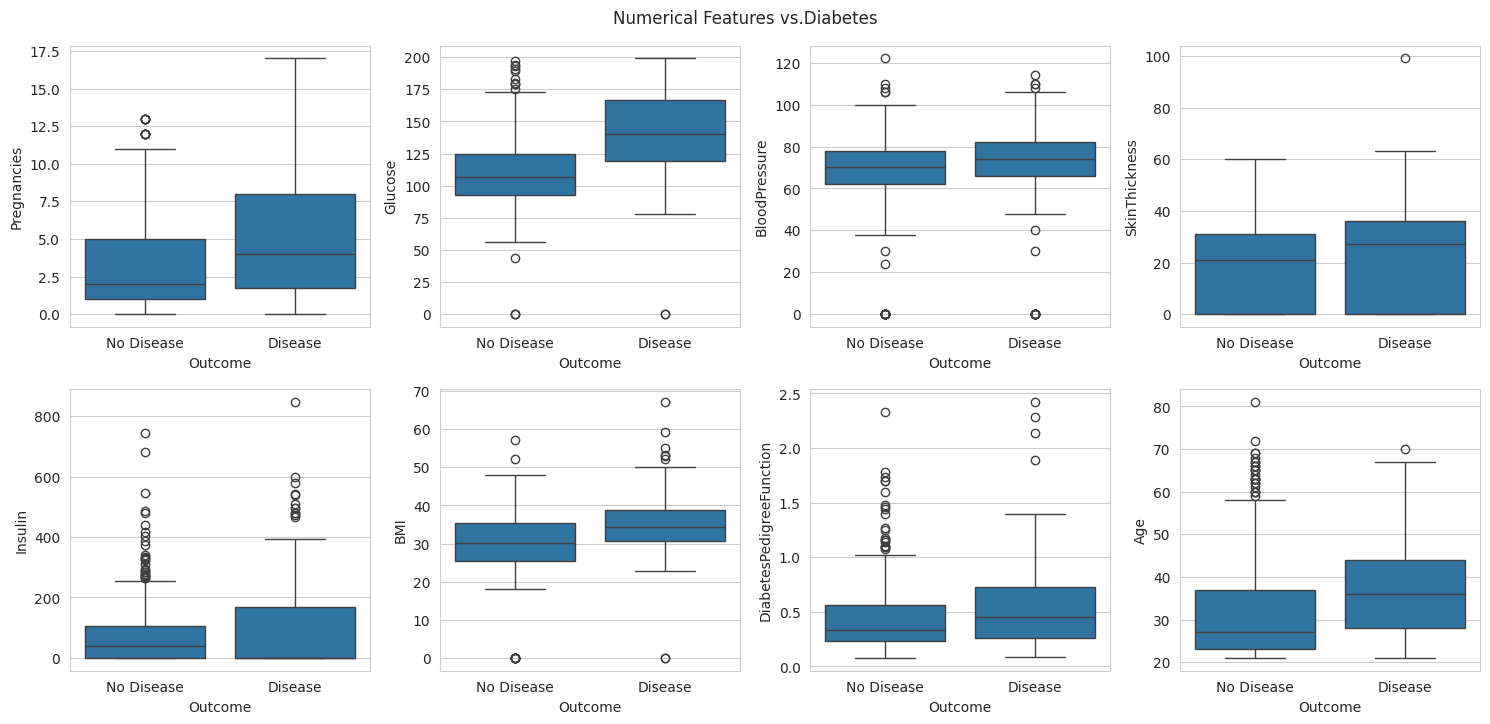

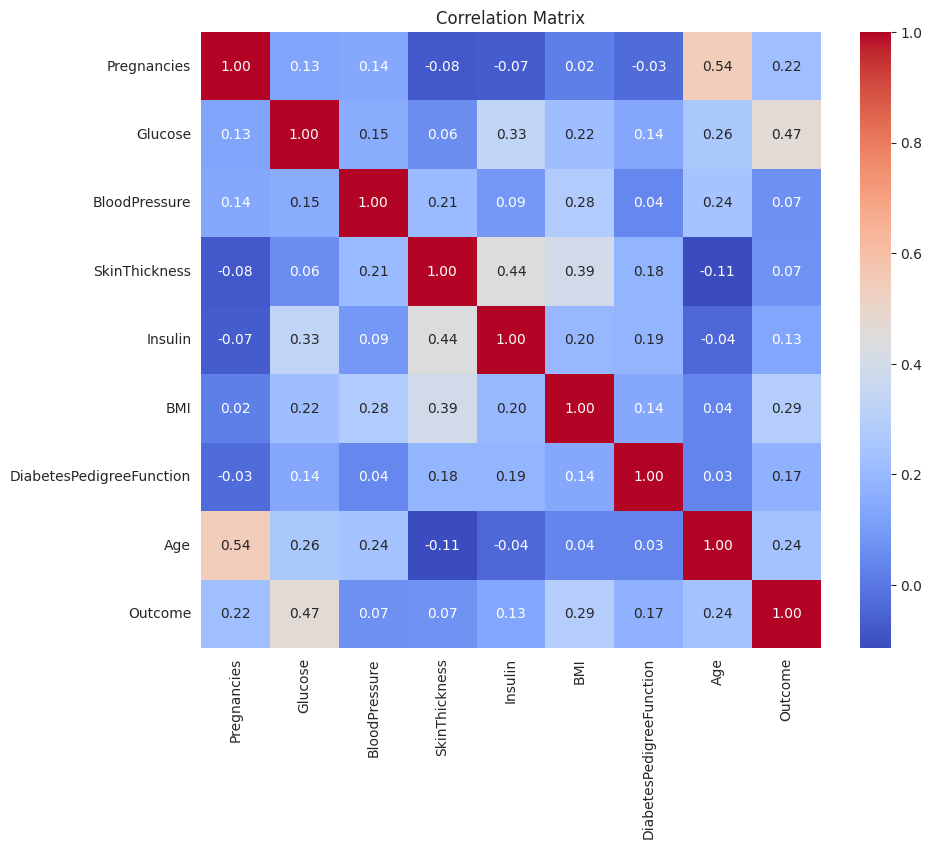

In [27]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns.drop('Outcome')):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.tight_layout()
plt.suptitle('Numerical Features vs.Diabetes', y=1.02)
plt.savefig('numerical_boxplots.png')


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')


plt.show()

# Encoding, Scaling

In [28]:

#df = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype=int)

print(df.head())


X = df.drop('Outcome', axis=1)
y = df['Outcome']


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\n--- After Scaling ---")


print(X_scaled.head())


final_X = X_scaled
final_y = y

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

--- After Scaling ---
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -

# Feature Engineering

In [29]:

cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)


for col in cols_to_replace:
    df[col] = df[col].fillna(df[col].mean())


df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].fillna(df['Insulin'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())




df['Glucose_BMI_Interaction'] = df['Glucose'] * df['BMI']


bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']


df['BMICategory'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Glucose_BMI_Interaction BMICategory  
0                     0.627   50        1                   4972.8       Obese  
1                     0.351   31        0                   2261.0  Overweight  
2                     0.672   32        1                   4263.9      Normal  
3                     0.167   21        0                   2500.9  Overweight  
4                     2.288   33        1                   5904.7       Obese  


In [30]:

df = pd.get_dummies(df, columns=['BMICategory'], drop_first=True, dtype=int)

df = df.drop('BMI', axis=1)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# evaluate the model using metrics such as accuracy,recall,precision,roc curve,auc score,confusion metrics.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)


print("--- Model Report Card  ---")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC Score: {auc_score:.2f}")

--- Model Report Card  ---
Accuracy: 0.75
Precision: 0.61
Recall: 0.78
AUC Score: 0.82


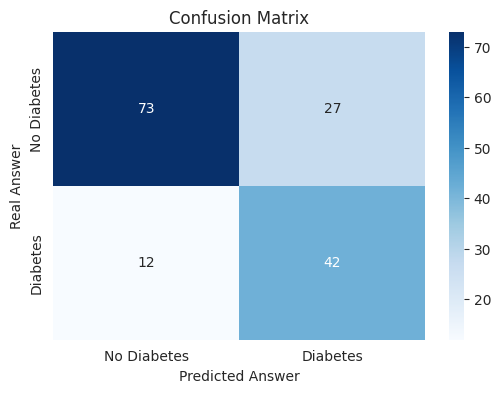

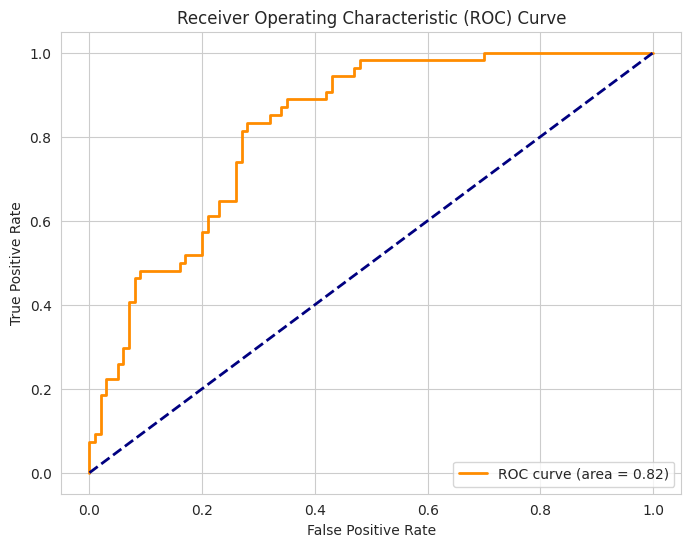

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Answer')
plt.ylabel('Real Answer')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')

plt.show()